In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Ç%matplotlib inline

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\iacop\\.matplotlib\\matplotlibrc'

In [3]:
from dataclasses import dataclass
@dataclass
class HarmonicOscillator():
    m : float
    k : float
    b : float = 0.
    def __post_init__(self):
        self.omega_0 = np.sqrt(self.k/self.m)
        self.beta = self.b/(2.*self.m)
        self.Q = self.omega_0/(2* self.beta)
        if self.beta < self.omega_0:
            self.type = 'underdamped'
            self.Omega = np.sqrt(self.omega_0**2-self.beta**2)
        elif self.beta > self.omega_0:
            self.type = 'overdamped'
            self.gamma = np.sqrt(-self.omega_0**2+self.beta**2)
        else:
            self.type = 'critical'

    def x(self, x0, v0, t):
        if self.type == 'underdamped':
            return np.exp(-self.beta*t) * (x0 * np.cos(self.omega_0 * t) + ((v0+self.beta*x0)/self.omega_0) *  np.sin(self.omega_0 * t))
        elif self.type == 'overdamped':
            return ((self.gamma-self.beta)*x0-v0)/(2*self.gamma) * np.exp(-(self.beta + self.gamma)*t) + ((self.gamma+self.beta)*x0+v0)/(2*self.gamma) * np.exp(-(self.beta - self.gamma)*t)
        elif self.type == 'critical':
            return (x0 + (v0 + self.beta*x0)*t)*np.exp(-self.beta*t)
    
    def v(self, x0, v0, t):
        if self.type == 'underdamped':
            return np.exp(-self.beta*t) * (v0 * np.cos(self.omega_0 * t) - (self.omega_0*x0 + (v0+self.beta*x0)*self.beta/self.omega_0) *  np.sin(self.omega_0 * t))
        elif self.type == 'overdamped':
            return -(self.beta + self.gamma)*((self.gamma-self.beta)*x0-v0)/(2*self.gamma) * np.exp(-(self.beta + self.gamma)*t) + -(self.beta - self.gamma)*((self.gamma+self.beta)*x0+v0)/(2*self.gamma) * np.exp(-(self.beta - self.gamma)*t)
        elif self.type == 'critical':
            return (v0 -self.beta*(v0 + self.beta*x0)*t)*np.exp(-self.beta*t)

    def E_c(self, x0, v0, t):
        return 0.5*self.m*self.v(x0, v0,t)**2
        
    def E_p(self, x0, v0, t):
        return 0.5*self.k*self.x(x0, v0,t)**2

    def E_m(self, x0, v0, t):
        return self.E_c(x0, v0, t) + self.E_p(x0, v0, t) 
    def amplitude_coefficient(self, omega):
        '''
        With a force F(t) = F_0 cos(omega t) x=A cos(omega t-delta) with A>0 in the stationary regime.
        This function returns A/F_0.
        '''
        return 1./(self.m*np.sqrt((self.omega_0**2-omega**2)**2+4*self.beta**2*omega**2))
    
    def amplitude_phase(self, omega):
        '''
        With a force F(t) = F_0 cos(omega t) x=A cos(omega t-delta) with A>0 in the stationary regime.
        This function returns delta.
        '''
        return np.arctan2(2*omega*self.beta, self.omega_0**2-omega**2)
    
    def impedance(self, omega):
        return 1/(omega*self.amplitude_coefficient(omega))
    
    def impedance_phase(self,omega):
        return -np.pi/2+self.amplitude_phase(omega)
    
    def x_forced(self, t, omega, F_0, phi):
        return np.cos(omega*t+phi-self.amplitude_phase(omega))*F_0*self.amplitude_coefficient(omega)
    
    def v_forced(self, t, omega, F_0, phi):
        return np.cos(omega*t+phi-self.impedance_phase(omega))*F_0/self.impedance(omega)
    
    def x_full(self, t, omega, F_0, phi,x0, v0):
        return self.x_forced(t, omega, F_0, phi) + self.x(
            x0 - self.x_forced(0, omega, F_0, phi), 
            v0 - self.v_forced(0, omega, F_0, phi),
            t)
    
    def v_full(self, t, omega, F_0, phi,x0, v0):
        return self.v_forced(t, omega, F_0, phi) + self.v(
            x0 - self.x_forced(0, omega, F_0, phi), 
            v0 - self.v_forced(0, omega, F_0, phi),
            t)

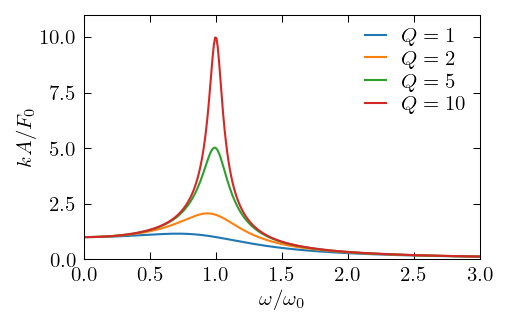

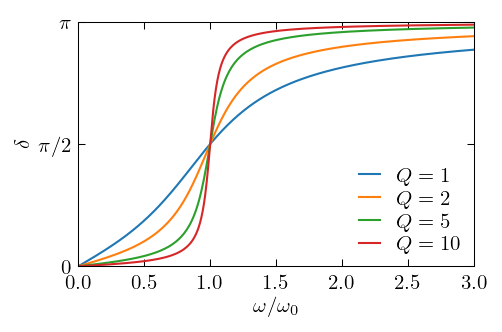

In [4]:
omega= np.linspace(0,3,300)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    plt.figure(1)
    plt.plot(omega, ho.amplitude_coefficient(omega),label =r'$Q={}$'.format(Q))
    plt.figure(2)
    plt.plot(omega, ho.amplitude_phase(omega),label =r'$Q={}$'.format(Q))
plt.figure(1)
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.ylim(0,11)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$kA/F_0$')
plt.savefig('resonancia_amplitud.pdf')
plt.savefig('resonancia_amplitud.png')
plt.figure(2)
plt.ylim(0,np.pi)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\delta$')
plt.yticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('resonancia_fase.pdf')
plt.savefig('resonancia_fase.png')

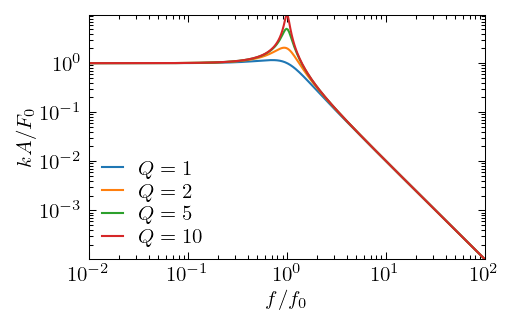

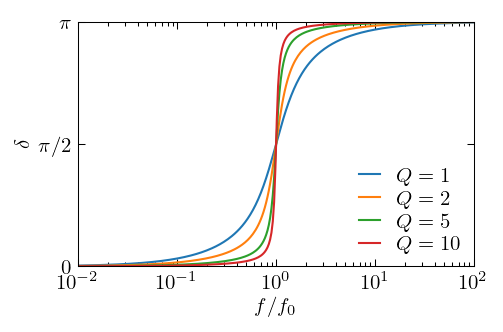

In [5]:
omega= np.logspace(-2,2,300)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    plt.figure(1)
    plt.plot(omega, ho.amplitude_coefficient(omega),label =r'$Q={}$'.format(Q))
    plt.figure(2)
    plt.plot(omega, ho.amplitude_phase(omega),label =r'$Q={}$'.format(Q))
plt.figure(1)
plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower left')
plt.xlabel(r'$f/f_0$')
plt.ylabel(r'$kA/F_0$')
plt.savefig('resonancia_amplitud_log.pdf')
plt.savefig('resonancia_amplitud_log.png')
plt.figure(2)
plt.xscale('log')
plt.xlabel(r'$f/f_0$')
plt.ylabel(r'$\delta$')
plt.yticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('resonancia_fase_log.pdf')
plt.savefig('resonancia_fase_log.png')

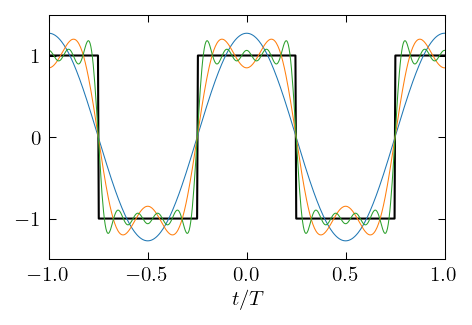

In [6]:
T=1
omega = 2*np.pi/T
t=np.linspace(-T,T,500)
harmonics = [4/(np.pi*(2*k-1))*(-1)**(k-1)*np.cos((2*k-1)*omega*t) for k in range(1,200)]
plt.plot(t, np.sign(np.cos(omega*t)), 'k')
#plt.plot(t, np.cos(omega*t))
for n in [1,2,5]:
    signal = np.zeros_like(t)
    for i in range(n):
        signal += harmonics[i]
    plt.plot(t,signal,lw=0.5)
plt.ylim(-1.5,1.5)
plt.xlabel(r'$t/T$')
plt.savefig('square_wave.pdf')
plt.savefig('square_wave.png')

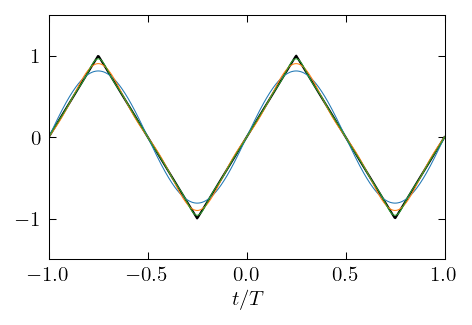

In [7]:
T=1
omega = 2*np.pi/T
t=np.linspace(-T,T,500)
harmonics = [-8/(np.pi**2*(2*k-1)**2)*(-1)**(k)*np.sin((2*k-1)*omega*t) for k in range(1,200)]
plt.plot(t, 2/np.pi*np.arcsin(np.sin(omega*t)), 'k')
#plt.plot(t, np.cos(omega*t))
for n in [1,2,5]:
    signal = np.zeros_like(t)
    for i in range(n):
        signal += harmonics[i]#
    plt.plot(t,signal,lw=0.5)
plt.ylim(-1.5,1.5)
plt.xlabel(r'$t/T$')
plt.savefig('triangle_wave.pdf')
plt.savefig('triangle_wave.png')

C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/356168477.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(omega, ho.k/omega,'k-.',lw=0.5)
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))


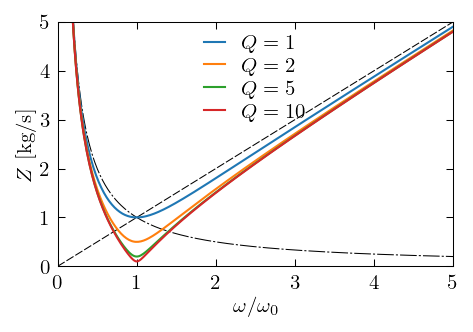

In [24]:
omega= np.linspace(0,5,300)
plt.plot(omega, ho.m*omega,'k--',lw=0.5)
plt.plot(omega, ho.k/omega,'k-.',lw=0.5)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    
    plt.plot(omega,ho.impedance(omega),label =r'$Q={}$'.format(Q))
plt.ylim(0, 5)
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper center')
plt.xlabel('$\omega/\omega_0$')
plt.ylabel(r'$Z~[{\rm kg /s}]$')
plt.savefig('impedance.pdf')
plt.savefig('impedance.png')

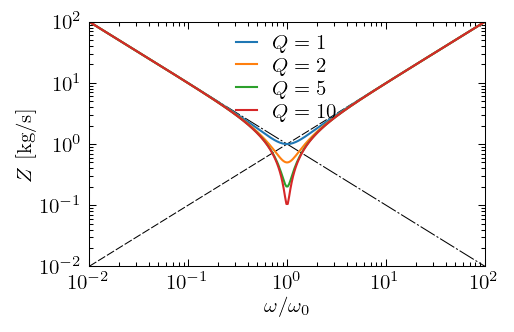

In [18]:
omega= np.logspace(-2,2,300)
plt.plot(omega, ho.m*omega,'k--',lw=0.5)
plt.plot(omega, ho.k/omega,'k-.',lw=0.5)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    
    plt.plot(omega,ho.impedance(omega),label =r'$Q={}$'.format(Q))
#plt.ylim(0, 30)

plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$Z~[{\rm kg /s}]$')
plt.yscale('log')
plt.xscale('log')
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper center')
plt.savefig('impedance_log.pdf')
plt.savefig('impedance_log.png')

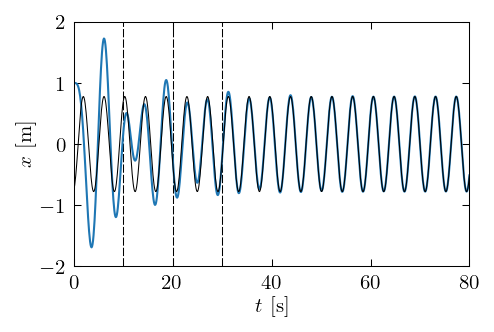

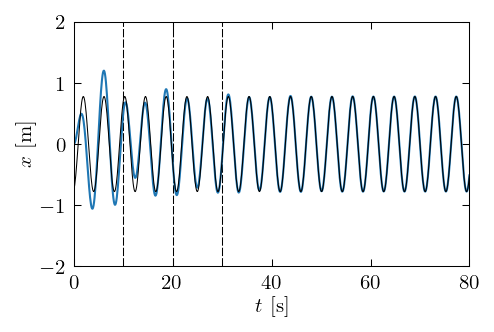

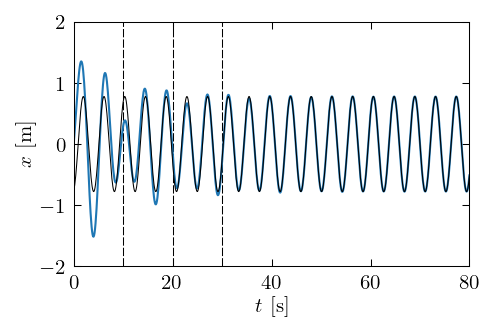

In [10]:
t = np.linspace(0,80,800)
omega = 1.5
ho = HarmonicOscillator(1,1,0.2)
plt.figure(1)
plt.plot(t,ho.x_full(t, omega=omega, F_0=1,phi=0,x0=1,v0=0))
plt.plot(t,ho.x_forced(t, omega=omega, F_0=1,phi=0),'k',lw=0.5)
plt.vlines(x= [1/ho.beta, 2/ho.beta,3/ho.beta],ymin=-2, ymax=2, ls='--',lw=0.5, colors='k')
plt.ylim(-2,2)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.savefig('transient_1.pdf')
plt.savefig('transient_1.png')
plt.figure(2)
plt.plot(t,ho.x_full(t, omega=omega, F_0=1,phi=0,x0=0,v0=0))
plt.plot(t,ho.x_forced(t, omega=omega, F_0=1,phi=0),'k',lw=0.5)
plt.vlines(x= [1/ho.beta, 2/ho.beta,3/ho.beta],ymin=-2, ymax=2, ls='--',lw=0.5, colors='k')
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.ylim(-2,2)
plt.savefig('transient_2.pdf')
plt.savefig('transient_2.png')
plt.figure(3)
plt.plot(t,ho.x_full(t, omega=omega, F_0=1,phi=0,x0=0,v0=1))
plt.plot(t,ho.x_forced(t, omega=omega, F_0=1,phi=0),'k',lw=0.5)
plt.vlines(x= [1/ho.beta, 2/ho.beta,3/ho.beta],ymin=-2, ymax=2, ls='--',lw=0.5, colors='k')
plt.ylim(-2,2)
plt.xlabel(r'$t~[{\rm s}]$')
plt.ylabel(r'$x~[{\rm m}]$')
plt.savefig('transient_3.pdf')
plt.savefig('transient_3.png')


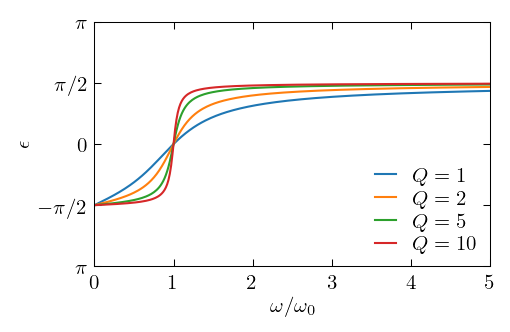

In [25]:
omega= np.linspace(0,5,300)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    plt.plot(omega, ho.impedance_phase(omega),label =r'$Q={}$'.format(Q))

plt.ylim(-np.pi,np.pi)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\epsilon$')
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],[r'$\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('impedance_phase.pdf')
plt.savefig('impedance_phase.png')

C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))
C:\Users\iacop\AppData\Local\Temp/ipykernel_21292/3905341443.py:59: RuntimeWarning: divide by zero encountered in divide
  return 1/(omega*self.amplitude_coefficient(omega))


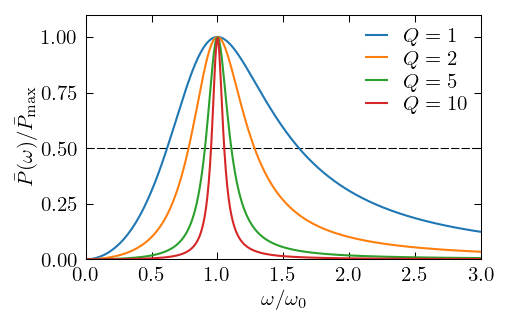

In [34]:
omega= np.linspace(0,3,300)
for Q in [1,2,5,10]:
    ho = HarmonicOscillator(1,1,1/Q)
    plt.plot(omega,2*ho.b* np.cos(ho.impedance_phase(omega))/(2*ho.impedance(omega)),label =r'$Q={}$'.format(Q))
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\bar{P}(\omega)/\bar{P}_{\rm max}$')
plt.hlines(y=0.5, xmin=omega[0], xmax=omega[-1], colors = 'k', ls='--', lw =0.5)
plt.ylim(0,1.1)
plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.savefig('potencia.pdf')
plt.savefig('potencia.png')

C:\Users\iacop\AppData\Local\Temp\ipykernel_21772\3905341443.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  self.Q = self.omega_0/(2* self.beta)


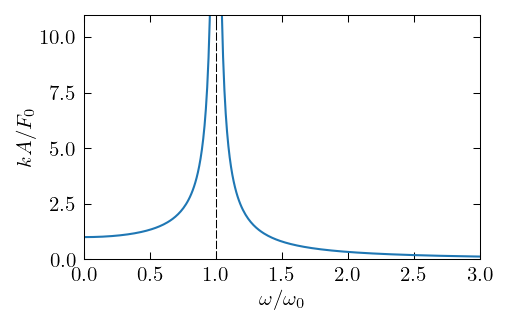

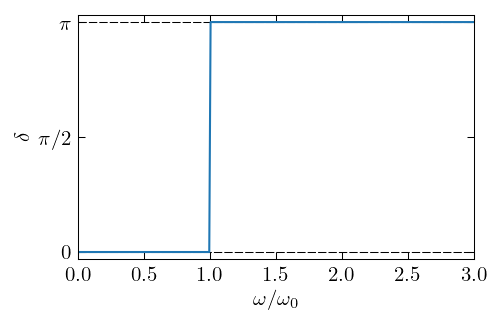

In [7]:
omega= np.linspace(0,3,300)
for Q in [np.inf]:
    ho = HarmonicOscillator(1,1,1/Q)
    plt.figure(1)
    plt.plot(omega, ho.amplitude_coefficient(omega),label =r'$Q={}$'.format(Q))
    plt.figure(2)
    plt.plot(omega, ho.amplitude_phase(omega),label =r'$Q={}$'.format(Q))
plt.figure(1)
#plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='upper right')
plt.vlines([1],ymin=0,ymax=11, colors='k', ls='--',lw=0.5)
plt.ylim(0,11)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$kA/F_0$')
plt.savefig('resonancia_amplitud_nodamping.pdf')
plt.savefig('resonancia_amplitud_nodamping.png')
plt.figure(2)
plt.hlines([0,np.pi],xmin=0,xmax=3, colors='k', ls='--',lw=0.5,zorder=0)
plt.ylim(-0.1,np.pi+0.1)
plt.xlabel(r'$\omega/\omega_0$')
plt.ylabel(r'$\delta$')
plt.yticks([0,np.pi/2,np.pi],[r'$0$',r'$\pi/2$',r'$\pi$'])
#plt.legend(frameon=False, handlelength=  1.0, labelspacing=0.2,borderaxespad= 0.2,loc='lower right')
plt.savefig('resonancia_fase_nodamping.pdf')
plt.savefig('resonancia_fase_nodamping.png')